### SA on sentences w/ medication
http://textminingonline.com/dive-into-nltk-part-ix-from-text-classification-to-sentiment-analysis

In [1]:
# Trained with nltk movie_reviews

In [2]:
import nltk
from nltk.corpus import movie_reviews
from random import shuffle
from nltk import tokenize
from nltk.tokenize import TweetTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import pandas as pd
import gensim
import nltk
import numbers
from nltk.sentiment.vader import SentimentIntensityAnalyzer

tknzr = TweetTokenizer()

/Users/elenajia/anaconda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [4]:
documents = [(list(movie_reviews.words(fileid)), category) 
for category in movie_reviews.categories()
for fileid in movie_reviews.fileids(category)]

In [5]:
shuffle(documents)

In [6]:
print (documents[0])

(['there', 'isn', "'", 't', 'much', 'good', 'about', 'this', 'movie', '.', 'not', 'much', 'i', 'can', 'say', 'about', 'the', 'acting', ',', 'directing', ',', 'or', 'writing', 'that', 'would', 'make', 'you', 'consider', 'seeing', 'this', 'movie', '.', 'so', 'i', "'", 'll', 'get', 'my', 'one', 'good', 'comment', 'out', 'of', 'the', 'way', ',', 'at', 'least', 'joel', 'schuemacher', '(', 'batman', '&', 'robin', ')', 'didn', "'", 't', 'direct', 'it', 'or', 'it', 'would', 'be', 'titled', '"', 'technicolor', 'city', '"', '.', 'in', 'fact', 'there', 'is', 'nothing', 'colorful', 'about', 'this', 'movie', ',', 'its', 'dark', 'and', 'depressingly', 'gloomy', 'right', 'down', 'to', 'the', 'bitter', 'end', '.', 'the', 'plot', 'has', 'a', 'tendency', 'to', 'be', 'interesting', ',', 'but', 'all', 'that', 'passes', 'while', 'your', 'laughing', 'at', 'the', 'ridiculous', 'things', 'thrown', 'into', 'what', 'could', 'have', 'been', 'a', 'fascinating', 'movie', '.', 'the', 'plot', 'is', 'impossible', 'to

In [7]:
len(documents)

2000

In [8]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())

In [9]:
# word_features = all_words.keys()[:2000]
word_features = list(all_words.keys())[:2000]

In [10]:
# len(featuresets)

In [11]:
# print (document_features(movie_reviews.words('pos/cv957_8737.txt')))

In [12]:
featuresets = [(document_features(d), c) for (d, c) in documents]

In [13]:
train_set, test_set = featuresets[100:], featuresets[:100]

In [14]:
# classifier = nltk.NaiveBayesClassifier.train(train_set)

full_classifier = nltk.NaiveBayesClassifier.train(featuresets)

In [15]:
print (nltk.classify.accuracy(full_classifier, test_set))

0.89


In [16]:
# classifier.show_most_informative_features(10)

### test

In [17]:
df1 = pd.read_csv('s_med.csv')

In [18]:
sent_a = list(df1['med_sentence'].values)

In [19]:
res_s_dic = []
# res_s_dic1 = []

df_res_s = pd.DataFrame([])

sid = SentimentIntensityAnalyzer()

for i, sentence in enumerate(sent_a[:5000]):
    test_set = document_features(tknzr.tokenize(sentence))  #TODO: change to tokenize
    # res_s_dic1.append(classifier.classify(test_set))
    
    prob_result = full_classifier.prob_classify(test_set)
    
    #     dic = {}
    #     dic["s"] = sentence
    #     dic["neg"] = prob_result.prob("neg")
    #     dic["pos"] = prob_result.prob("pos")
    
    # res_s_dic.append(dic)
    df_res_s.loc[i,'neg_prob'] = prob_result.prob("neg")
    df_res_s.loc[i,'pos_prob'] = prob_result.prob("pos")
    
    sid_s = sid.polarity_scores(sentence)
    df_res_s.loc[i,'neg_vader'] = sid_s['neg']
    df_res_s.loc[i,'neu_vader'] = sid_s['neu']
    df_res_s.loc[i,'pos_vader'] = sid_s['pos']
    
    df_res_s.loc[i,'sentence'] = sentence
    
# df_res_s[df_res_s['pos_prob'] > .001]['sentence']
print(df_res_s['pos_prob'].max())
print(df_res_s['pos_vader'].max())
df_res_s.to_csv('s_med_with_score_first5000.csv')
print (df_res_s)

0.885723724508
0.647
      neg_prob  pos_prob  neg_vader  neu_vader  pos_vader  \
0     0.999358  0.000642      0.227      0.724      0.049   
1     0.999837  0.000163      0.081      0.791      0.128   
2     0.999824  0.000176      0.000      0.851      0.149   
3     0.999947  0.000053      0.000      1.000      0.000   
4     0.996569  0.003431      0.032      0.770      0.198   
5     0.999981  0.000019      0.000      1.000      0.000   
6     0.999828  0.000172      0.000      0.695      0.305   
7     0.999943  0.000057      0.000      0.794      0.206   
8     0.999760  0.000240      0.083      0.917      0.000   
9     0.999171  0.000829      0.251      0.749      0.000   
10    0.999660  0.000340      0.000      1.000      0.000   
11    0.999869  0.000131      0.052      0.862      0.086   
12    0.998438  0.001562      0.187      0.750      0.063   
13    0.999779  0.000221      0.066      0.778      0.156   
14    0.999931  0.000069      0.000      0.915      0.085   
15 

In [20]:
prob_result = full_classifier.prob_classify(document_features(tknzr.tokenize(str('I love it! This is great!!!'))))
print(prob_result.prob("neg"), prob_result.prob("pos"))


0.9999248550133579 7.51449866528843e-05


In [21]:
# df_res_s = pd.DataFrame(res_s_dic)
# print (df_res_s)

# df_res_s.to_csv('s_med_with_score_first100.csv')

In [22]:
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

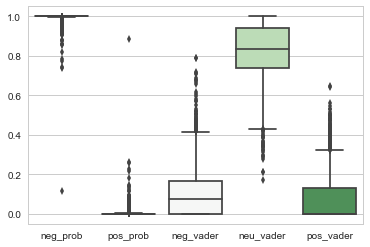

In [23]:
ax = sns.boxplot(data = df_res_s,palette = "PRGn")

#### posts

In [24]:
df2 = pd.read_csv('p_med.csv')

In [25]:
post_a = list(df2['selftext'].values)

In [32]:
res_p_dic = []

df_res_p = pd.DataFrame([])


for i, post in enumerate(post_a[:5000]):
    
    test_set = document_features(tknzr.tokenize(str(post)))  #TODO: change to tokenize
    # res_s_dic1.append(classifier.classify(test_set))
    
    prob_result = full_classifier.prob_classify(test_set)
    
    #     dic = {}
    #     dic["s"] = sentence
    #     dic["neg"] = prob_result.prob("neg")
    #     dic["pos"] = prob_result.prob("pos")
    
    # res_s_dic.append(dic)
    df_res_p.loc[i,'neg_prob'] = prob_result.prob("neg")
    df_res_p.loc[i,'pos_prob'] = prob_result.prob("pos")
    
    sid_p = sid.polarity_scores(str(post))
    df_res_p.loc[i,'neg_vader'] = sid_p['neg']
    df_res_p.loc[i,'neu_vader'] = sid_p['neu']
    df_res_p.loc[i,'pos_vader'] = sid_p['pos']
    
    df_res_p.loc[i,'post'] = post
    
    
# df_res_s[df_res_s['pos_prob'] > .001]['sentence']
print(df_res_p['pos_prob'].max())
print(df_res_p['pos_vader'].max())
df_res_p.to_csv('p_med_with_score_first5000.csv')
print (df_res_p)



0.999998620353
0.344
      neg_prob  pos_prob  neg_vader  neu_vader  pos_vader  \
0     0.987449  0.012551      0.156      0.771      0.073   
1     0.994773  0.005227      0.204      0.708      0.088   
2     0.997802  0.002198      0.263      0.688      0.049   
3     0.928401  0.071599      0.164      0.730      0.106   
4     0.999992  0.000008      0.000      0.950      0.050   
5     0.997977  0.002023      0.209      0.754      0.038   
6     0.997678  0.002322      0.092      0.808      0.100   
7     0.998581  0.001419      0.109      0.696      0.195   
8     0.117632  0.882368      0.200      0.714      0.086   
9     0.132913  0.867087      0.085      0.786      0.128   
10    0.999156  0.000844      0.121      0.808      0.071   
11    0.039714  0.960286      0.160      0.723      0.117   
12    0.993021  0.006979      0.153      0.787      0.060   
13    0.999615  0.000385      0.273      0.596      0.130   
14    0.658450  0.341550      0.088      0.856      0.057   
15 

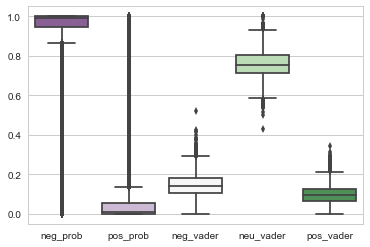

In [33]:
ax_2 = sns.boxplot(data= df_res_p,palette="PRGn")